In [1]:
import numpy as np 
import cv2 
import math
import matplotlib.pyplot as plt

In [2]:
img = np.zeros((200, 200))
zbuff = np.zeros_like(img)+ float('inf')

In [3]:
def project(point, k):
    projm = np.zeros((2, 3))
    mul = k/(k+point[2, 0])
    projm[0, 0] = mul
    projm[1, 1] = mul
    return projm@point

In [38]:
def draw_cross(img, x, y, size=1, color=255, thickness=1):
    x, y = int(x), int(y)
    p1 = (x, y-size)
    p2 = (x, y+size)
    p3 = (x-size, y)
    p4 = (x+size, y)
    img = cv2.line(img, p1, p2, color, thickness)
    img = cv2.line(img, p3, p4, color, thickness)
    return img

In [39]:
def draw_points(img, points, k):
    for p in points:
        p = p+ 300 #change later
        proj = project(p, k).astype('int')
        try:
            if zbuff[proj[0], proj[1]] > p[2, 0]:
                zbuff[proj[0], proj[1]] = p[2, 0]
                img = draw_cross(img, proj[0], proj[1])
        except:
            pass
    return img

def rotate_points(points, xalpha=0, yalpha=0, zalpha=0):
    sinx, cosx = math.sin(xalpha), math.cos(xalpha)
    siny, cosy = math.sin(yalpha), math.cos(yalpha)
    sinz, cosz = math.sin(zalpha), math.cos(zalpha)
    xrot = [[1,    0,     0],
            [0, cosx, -sinx],
            [0, sinx,  cosx]]
    xrot = np.array(xrot)
    yrot = [[cosy, 0, -siny],
            [0,    1,     0],
            [siny, 0,  cosy]]
    yrot = np.array(yrot)
    zrot = [[cosz, -sinz, 0],
            [sinz,  cosz, 0],
            [0,        0, 1]]
    zrot = np.array(zrot)
    new_points = []
    for p in points:
        p2 = xrot@(yrot@(zrot@p))
        new_points.append(p2)
    return new_points

In [64]:
for i in range(0, 300):
    angl = 3.14*2/100*i
    nps = rotate_points(donut, zalpha=angl, xalpha=angl, yalpha=angl)
    img = np.zeros((200, 200))
    zbuff = np.zeros_like(img)+ float('inf')
    img2 = draw_points(img, nps, 200)
    cv2.imshow('slika', img2)
    h = cv2.waitKey(15)
    if h != 255 and h!= -1:
        import time
        time.sleep(1  )
    print(i, end='\r')

cv2.destroyAllWindows()

298299

In [49]:
cv2.destroyAllWindows()

In [16]:
nper = 20

angles = [3.14*2/nper*i for i in range(nper)]
circle = [[math.cos(angl), math.sin(angl)] for angl in angles]
cilindar = [[[x], [y], [z]] for z in range(1, 4) for x, y in circle]
cilindar = [np.array(c)*100 for c in cilindar]

In [61]:
nper_L = 30
nper_S = 10
R = 0.8
r = 0.2
z0 = 1.5
donut = []
from math import cos, sin
angles1 = [3.14*2/nper_L*i for i in range(nper_L)]
angles2 = [3.14*2/nper_S*i for i in range(nper_S)]
for angl1 in angles1:
    for angl2 in angles2:
        R2 = R+r*cos(angl2)
        l = [[R2*cos(angl1)], [r*sin(angl2)], [z0 - R2*sin(angl1)]]
        donut.append(l)

donut = [np.array(c)*100 for c in donut]

In [69]:
ps = [[[x], [y], [z]] for x in range(-1, 2, 2) for y in range(-1, 2, 2) for z in range(1, 3)]
ps = [np.array(p) for p in ps]
ps = [p*100 for p in ps]
cube = ps

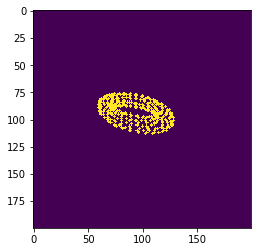

In [73]:
nps = rotate_points(donut, zalpha=3.14/2*0)
img = np.zeros((200, 200))
zbuff = np.zeros_like(img)+ float('inf')
img2 = draw_points(img, nps, 200)
plt.imshow(img2);

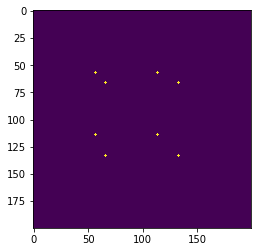

In [72]:
img = np.zeros((200, 200))
zbuff = np.zeros_like(img)+ float('inf')
img2 = draw_points(img, ps, 200)
plt.imshow(img2);